<a href="https://colab.research.google.com/github/MissMakara/Vizualizations/blob/main/Heat_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_excel("airbnb listings.xlsx", usecols=[4,12,11], names =['Property','Scores','Prices'])
df

,Property,Scores,Prices
0,Apartment,145,NaN
1,Apartment,37,NaN
2,Apartment,28,NaN
3,Apartment,199,NaN
4,Apartment,549,96.0
...,...,...,...
30473,Apartment,300,NaN
30474,Apartment,125,NaN
30475,Other,80,NaN
30476,Apartment,35,NaN


In [ ]:
df.shape

(30478, 3)

In [ ]:
#Handle the missing data
df_clean = df.dropna(subset=['Scores','Prices'])
df_clean.shape

(22155, 3)

In [ ]:
df_clean

,Property,Scores,Prices
4,Apartment,549,96.0
5,Apartment,149,100.0
6,Apartment,250,100.0
7,Apartment,90,94.0
8,Apartment,270,90.0
...,...,...,...
30332,Apartment,90,100.0
30347,Apartment,65,80.0
30378,Loft,55,100.0
30404,Apartment,60,100.0


In [ ]:
df_clean.Property.unique()

array(['Apartment', 'Other', 'Bed & Breakfast', 'Loft', 'Condominium',
       'House', 'Townhouse', nan, 'Dorm', 'Boat', 'Cabin', 'Villa',
       'Bungalow', 'Camper/RV', 'Treehouse', 'Lighthouse', 'Chalet',
       'Castle', 'Hut'], dtype=object)

In [ ]:
#obtain the scores column for normalization
df_scores=pd.DataFrame(df_clean.Scores)
df_scores


,Scores
4,549
5,149
6,250
7,90
8,270
...,...
30332,90
30347,65
30378,55
30404,60


In [ ]:
# Normalizing The Column

from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df_scores)
df_normalized = pd.DataFrame(x_scaled)




In [ ]:
# Viewing the dataframe
scores=df_normalized.values
scores

array([[0.05395395],
       [0.01391391],
       [0.02402402],
       ...,
       [0.0045045 ],
       [0.00500501],
       [0.00890891]])

In [ ]:
#add the normalized scores to the dataset
df_clean_copy=df_clean.copy()
df_clean_copy["Normalized_Scores"]=scores
df_clean_copy

,Property,Scores,Prices,Normalized_Scores
4,Apartment,549,96.0,0.053954
5,Apartment,149,100.0,0.013914
6,Apartment,250,100.0,0.024024
7,Apartment,90,94.0,0.008008
8,Apartment,270,90.0,0.026026
...,...,...,...,...
30332,Apartment,90,100.0,0.008008
30347,Apartment,65,80.0,0.005506
30378,Loft,55,100.0,0.004505
30404,Apartment,60,100.0,0.005005


In [ ]:
#drop the initial un-normalized scores column
df_clean_copy.drop('Scores', inplace=True, axis=1)
df_clean_copy

,Property,Prices,Normalized_Scores
4,Apartment,96.0,0.053954
5,Apartment,100.0,0.013914
6,Apartment,100.0,0.024024
7,Apartment,94.0,0.008008
8,Apartment,90.0,0.026026
...,...,...,...
30332,Apartment,100.0,0.008008
30347,Apartment,80.0,0.005506
30378,Loft,100.0,0.004505
30404,Apartment,100.0,0.005005


In [ ]:

df_2 = df_clean_copy.groupby(['Property','Normalized_Scores']).mean()


In [ ]:
df_2

Prices
Property  Normalized_Scores            
Apartment 0.001001            81.000000
          0.001101            80.000000
          0.001401            85.500000
          0.001502            99.333333
          0.001602            98.500000
...                                 ...
Villa     0.006006            87.000000
          0.011011            86.000000
          0.017017            92.000000
          0.018519            98.000000
          0.028929           100.000000

[1027 rows x 1 columns]

In [ ]:

df_2_pivot = df_2.unstack(level=0)

In [ ]:
df_2_pivot

Prices                       ...                          
Property          Apartment Bed & Breakfast Boat  ... Townhouse Treehouse Villa
Normalized_Scores                                 ...                          
0.000000                NaN             NaN  NaN  ...       NaN       NaN   NaN
0.001001               81.0             NaN  NaN  ...       NaN       NaN   NaN
0.001101               80.0             NaN  NaN  ...       NaN       NaN   NaN
0.001201                NaN             NaN  NaN  ...       NaN       NaN   NaN
0.001401               85.5             NaN  NaN  ...       NaN       NaN   NaN
...                     ...             ...  ...  ...       ...       ...   ...
0.309309              100.0             NaN  NaN  ...       NaN       NaN   NaN
0.349349              100.0             NaN  NaN  ...       NaN       NaN   NaN
0.449449                NaN             NaN  NaN  ...       NaN       NaN   NaN
0.499499               76.0             NaN  NaN  ...       NaN       NaN   NaN
1.000000               95.0             NaN  NaN  ...       NaN       NaN   NaN

[463 rows x 18 columns]

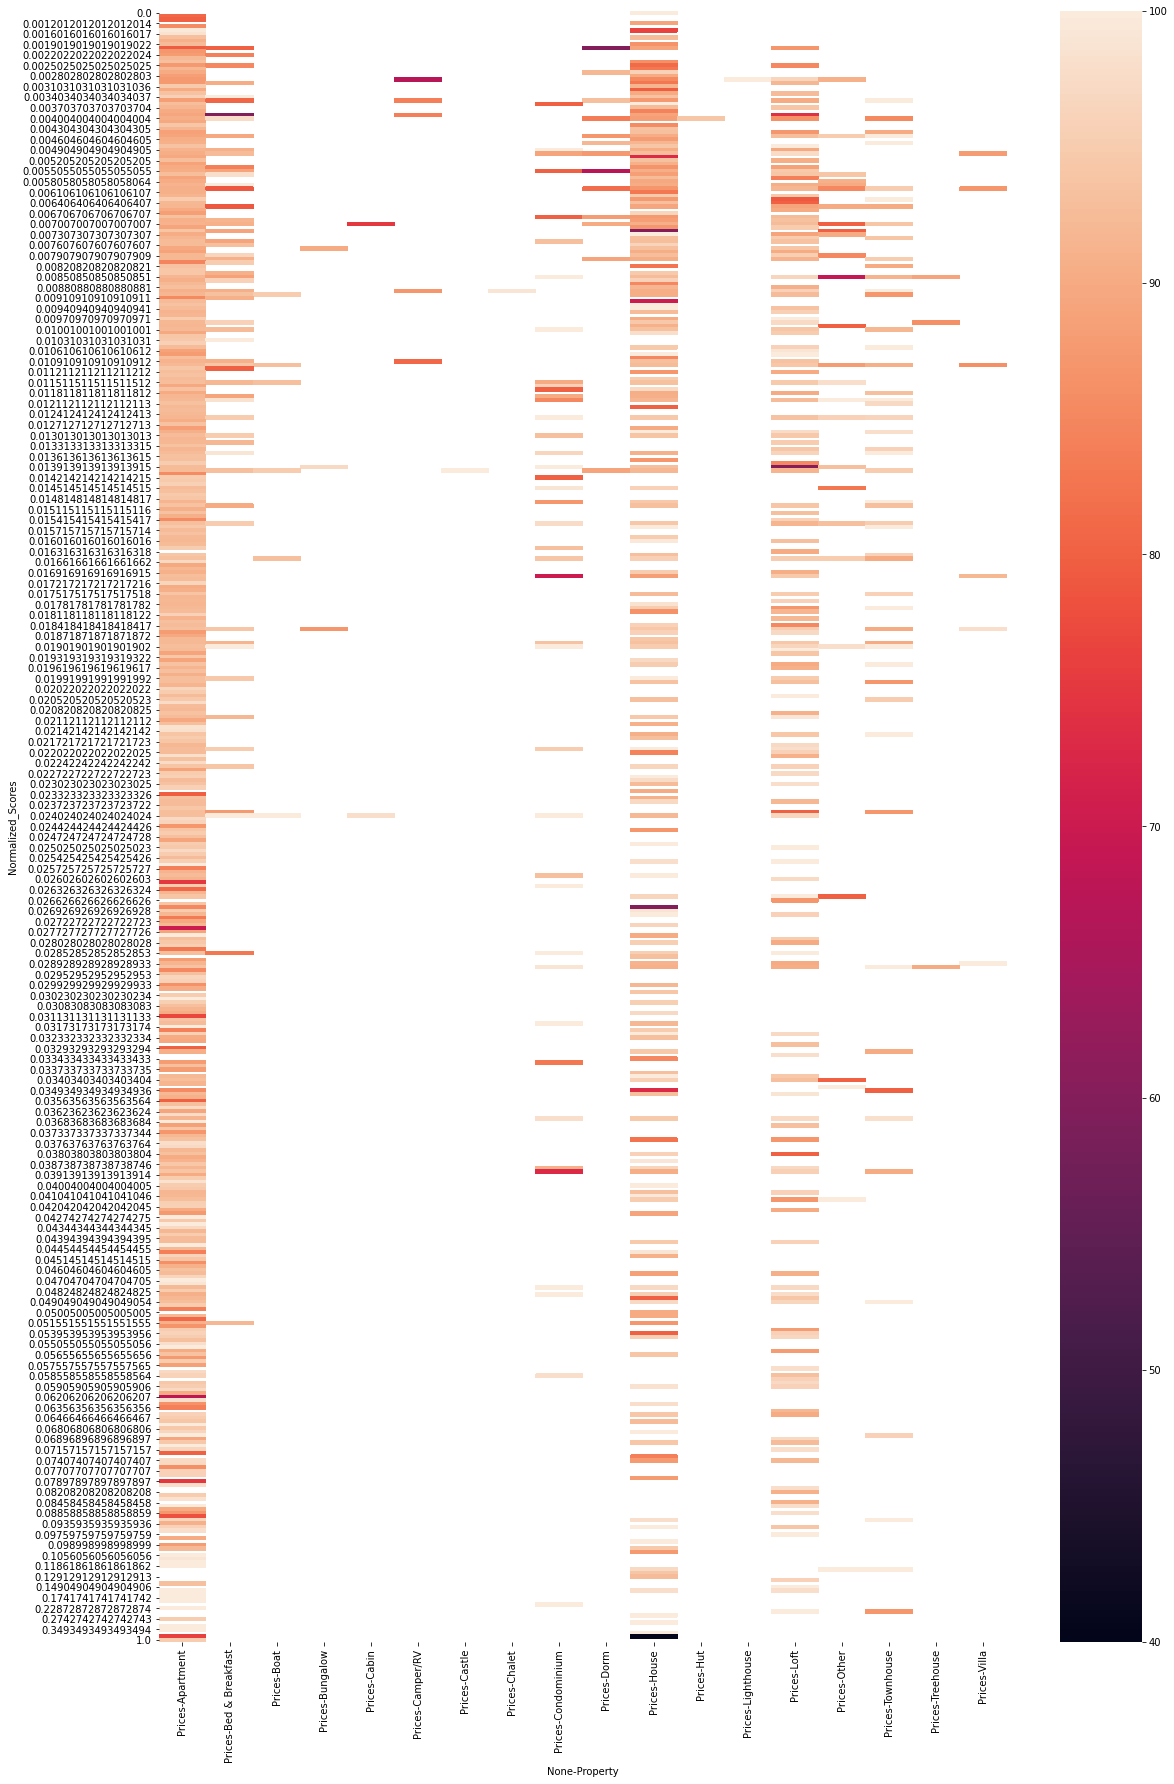

In [ ]:
fig, ax = plt.subplots(figsize=(19, 30))
sns.heatmap(df_2_pivot)
plt.show()